# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [4]:
data[data['ItemType'].isnull()]

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
66439,2017,10,REPUBLIC NATIONAL DISTRIBUTING CO,347939,FONTANAFREDDA BAROLO SILVER LABEL 750 ML,NaN,0.0,0.0,1.0


In [5]:
data['ItemType'] = data['ItemType'].replace(np.NaN, 'WINE')
data['ItemType'].unique()

array(['WINE', 'LIQUOR', 'BEER', 'STR_SUPPLIES', 'REF', 'NON-ALCOHOL',
       'KEGS', 'DUNNAGE'], dtype=object)

In [6]:
data[data['ItemType']=='STR_SUPPLIES'].head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
24,2017,4,Default,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,0.0,2.0,0.0
48,2017,4,Default,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,0.0,2.0,0.0
136,2017,4,Default,114,WINE PAPER GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,0.0,56.0,0.0
4054,2017,4,KAHN PAPER COMPANY INC,8001,BAGS - PAPER 1/6 BARREL,STR_SUPPLIES,0.0,29.0,0.0
4080,2017,4,KAHN PAPER COMPANY INC,8010,BAGS - PAPER QUARTS,STR_SUPPLIES,0.0,35.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [17]:
data_clean

,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,WINE,0.00,1.0,0.0
1,WINE,0.00,1.0,0.0
2,LIQUOR,0.00,8.0,0.0
3,LIQUOR,0.00,2.0,0.0
4,WINE,0.00,4.0,0.0
...,...,...,...,...
128350,BEER,66.46,59.0,212.0
128351,BEER,9.08,7.0,35.0
128352,KEGS,0.00,0.0,32.0
128353,REF,0.00,0.0,-35.0


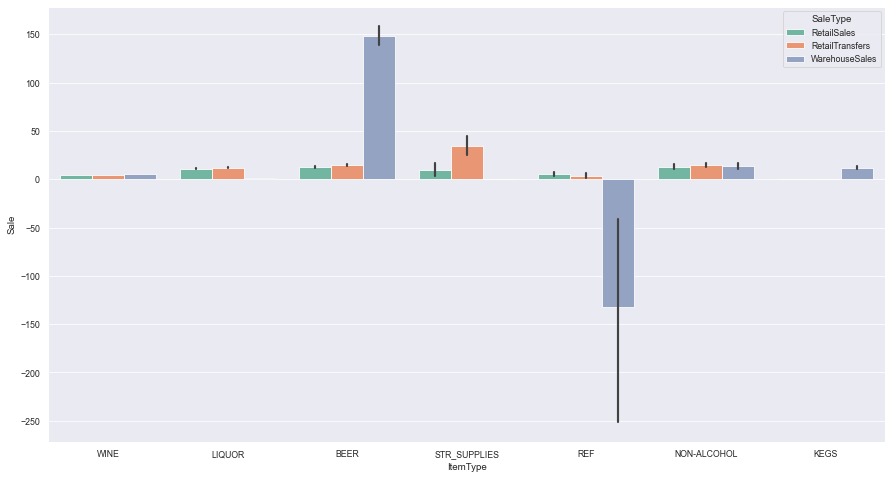

In [7]:
ch1 = data[['ItemType','RetailSales','RetailTransfers','WarehouseSales']]
col_eliminar = list(ch1[ch1['ItemType'] == 'DUNNAGE'].index)

data_clean = ch1.drop(col_eliminar,axis=0)
data_clean[data_clean['ItemType'] == 'DUNNAGE']

sales = data_clean.melt(id_vars='ItemType', var_name='SaleType', value_name='Sale')

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})

sns.barplot(y=sales['Sale'], x=sales['ItemType'],hue=sales['SaleType'], palette='Set2');

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [8]:
# ch1 = data[['Supplier','RetailSales','RetailTransfers','WarehouseSales']]
top_suppliers = data.groupby('Supplier', as_index=False).agg({'RetailSales':'sum',
                            'RetailTransfers':'sum',
                            'WarehouseSales':'sum'})
top_suppliers['Total'] = top_suppliers['RetailSales']+top_suppliers['RetailTransfers']+top_suppliers['WarehouseSales']
top_suppliers_2 = top_suppliers.sort_values('Total', ascending=False).head(10)
top_suppliers_2

,Supplier,RetailSales,RetailTransfers,WarehouseSales,Total
184,MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
69,CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
15,ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
139,HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
94,E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
78,DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
65,CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
150,JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
288,THE WINE GROUP,25758.15,28462.05,26603.78,80823.98
38,BOSTON BEER CORPORATION,10773.25,11869.96,53420.91,76064.12


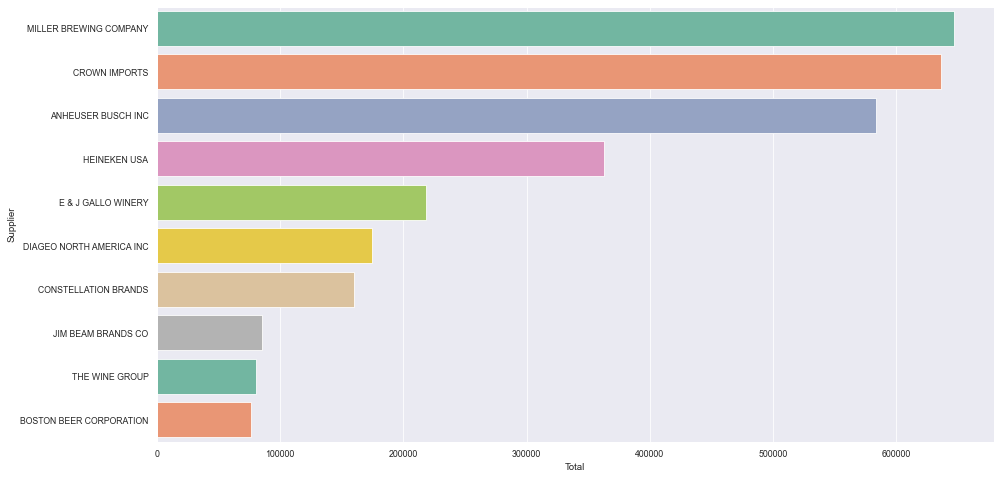

In [9]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})

sns.barplot(x=top_suppliers_2['Total'], y=top_suppliers_2['Supplier'], palette='Set2');

In [10]:
# top_suppliers = data[['Supplier','RetailSales','RetailTransfers','WarehouseSales']].head(10)
# col_eliminar = list(ch1[ch1['Suppliers'] == 'DUNNAGE'].index)

# data_clean = ch1.drop(col_eliminar,axis=0)
# data_clean[data_clean['ItemType'] == 'DUNNAGE']

# sales = top_suppliers.melt(id_vars='Supplier', var_name='SaleType', value_name='Sale')
sales
# sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})

# sns.barplot(x=sales['Sale'], y=sales['Supplier'],hue=sales['SaleType'], palette='Set2');

,ItemType,SaleType,Sale
0,WINE,RetailSales,0.0
1,WINE,RetailSales,0.0
2,LIQUOR,RetailSales,0.0
3,LIQUOR,RetailSales,0.0
4,WINE,RetailSales,0.0
...,...,...,...
384964,BEER,WarehouseSales,212.0
384965,BEER,WarehouseSales,35.0
384966,KEGS,WarehouseSales,32.0
384967,REF,WarehouseSales,-35.0


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [41]:
media_mes = data.groupby(['Year','Month'], as_index=True).agg({'RetailSales':'mean',
                            'RetailTransfers':'mean',
                            'WarehouseSales':'mean'})
media_mes


RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

<AxesSubplot:xlabel='Year,Month'>

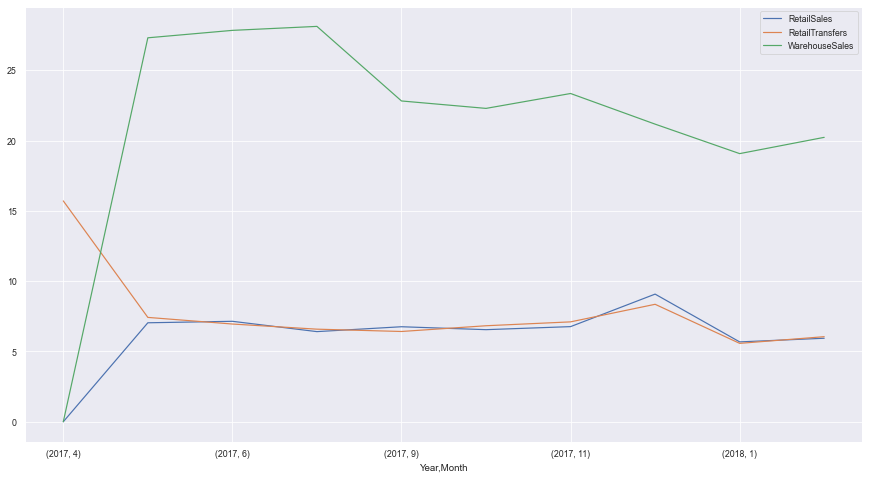

In [12]:
media_mes.plot()

In [124]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data['Month'].replace(to_replace=(1,2), value=(13,14), inplace=True)
data[data['Month']==13]

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
101911,2018,13,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,1.0
101912,2018,13,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.00,0.0,1.0
101913,2018,13,ROYAL WINE CORP,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,0.00,0.0,1.0
101914,2018,13,RELIABLE CHURCHILL LLLP,1001,SAM SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
101915,2018,13,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...
115251,2018,13,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,60.74,82.0,149.3
115252,2018,13,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,7.50,16.0,45.0
115253,2018,13,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,31.0
115254,2018,13,NaN,BC,BEER CREDIT,REF,0.00,0.0,-21.0


## 4. Plot the same information as above but as a bar chart.

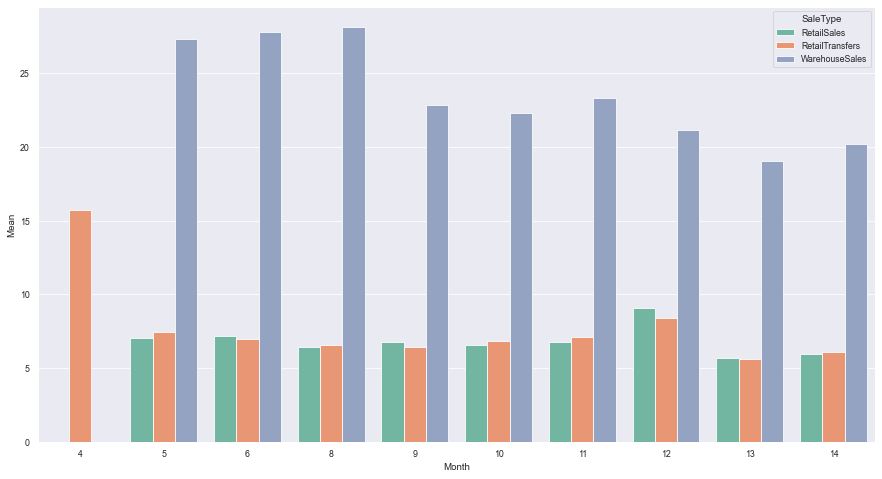

In [125]:


media_mes = data.groupby(['Year','Month'], as_index=False).agg({'RetailSales':'mean',
                            'RetailTransfers':'mean',
                            'WarehouseSales':'mean'})
media_mes.drop(['Year'],axis=1, inplace=True)
avg_mes = media_mes.melt(id_vars='Month', var_name='SaleType', value_name='Mean')
# avg_mes

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
sns.barplot(y=avg_mes['Mean'], x=avg_mes['Month'], hue=avg_mes['SaleType'], palette='Set2');

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

<AxesSubplot:xlabel='Month', ylabel='RetailSales'>

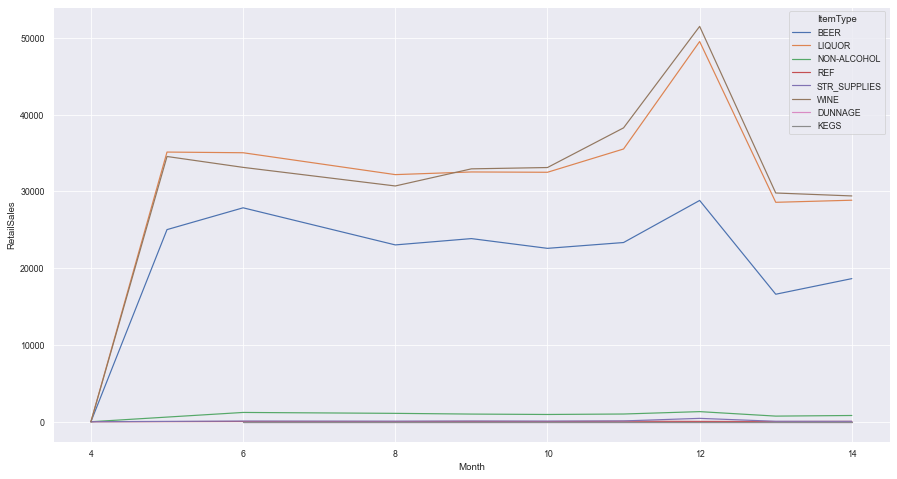

In [129]:
rtl_sales = data.groupby(['Year','Month','ItemType'], as_index=False).agg({'RetailSales':'sum'})
x=rtl_sales['Month']
y=rtl_sales['RetailSales']
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
sns.lineplot(x, y, hue=rtl_sales['ItemType'])


## 6. Plot the same information as above but as a bar chart.

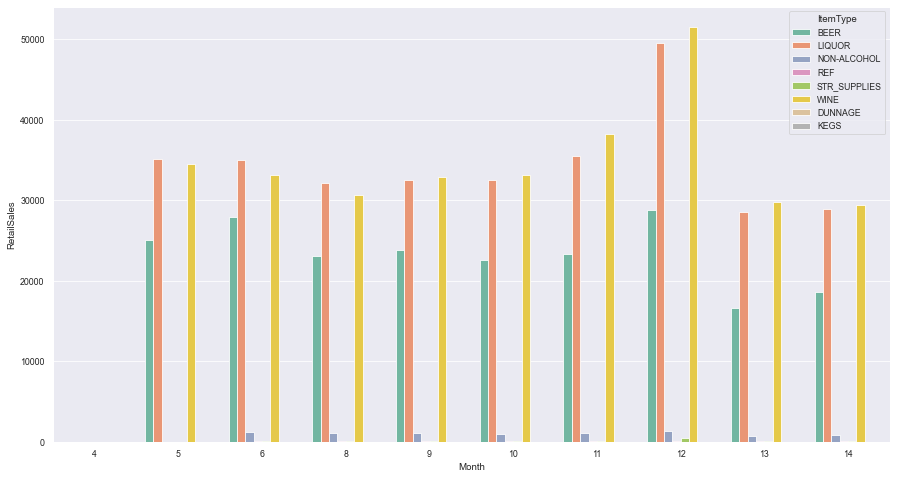

In [130]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
sns.barplot(x=x, y=y, hue=rtl_sales['ItemType'], palette='Set2');

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

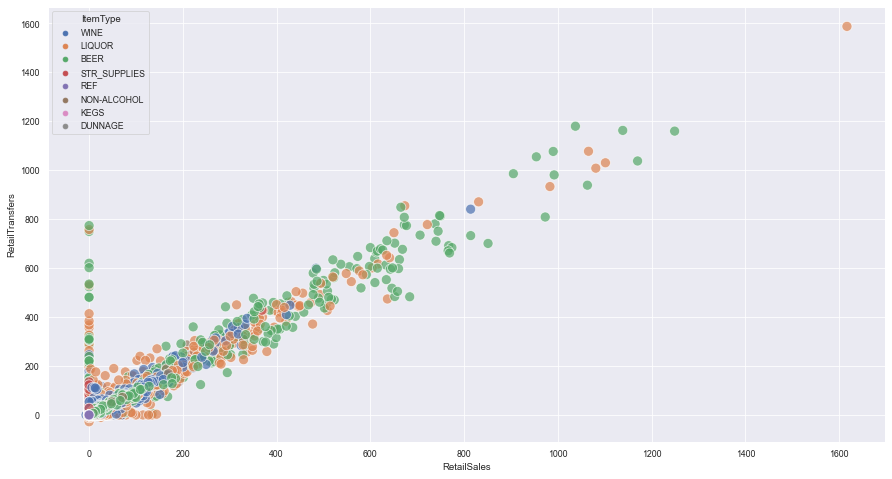

In [143]:
x = data['RetailSales']
y = data['RetailTransfers']
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
sns.scatterplot(x, y, hue=data['ItemType'], s=100, alpha=0.7);

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

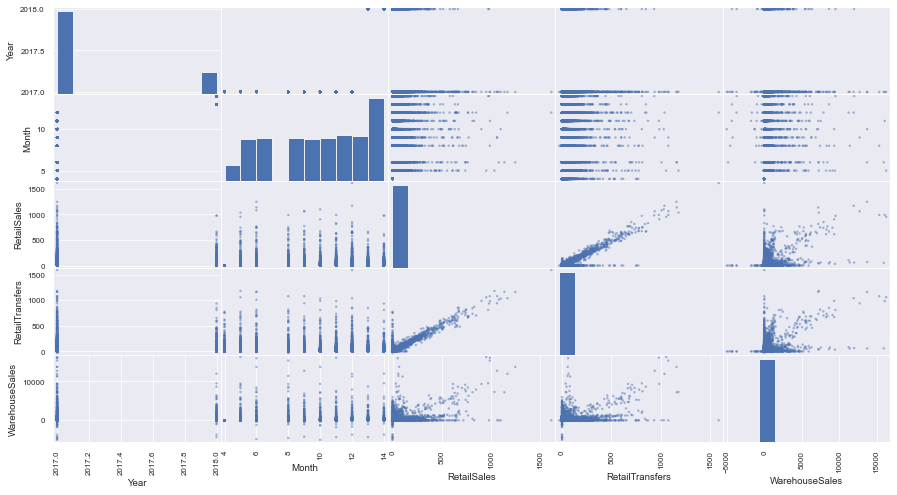

In [147]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
pd.plotting.scatter_matrix(data);